Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
test=pd.read_csv("test_lAUu6dG.csv")
train=pd.read_csv("train_ctrUa4K.csv")

In [3]:
#Combined the data
combined=pd.concat([train,test],ignore_index=True)

In [5]:
train.shape,test.shape,combined.shape

((614, 13), (367, 12), (981, 13))

In [6]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# check the missing values
combined.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [9]:
# Plotting the Number variables
combined.select_dtypes(include=np.number).columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

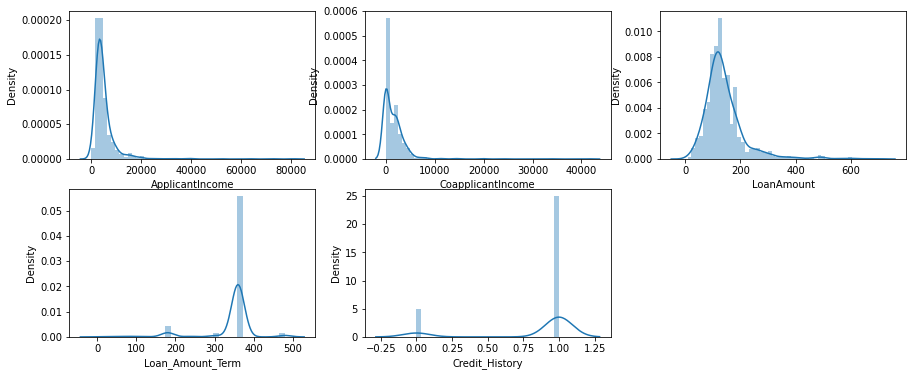

In [17]:
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

a=2
b=3
c=1
plt.figure(figsize=[15,6])
for i in num_cols:
  plt.subplot(a,b,c)
  sns.distplot(combined.loc[:,i])
  plt.xlabel(i)
  c=c+1

plt.show()


In [11]:
combined.select_dtypes(exclude=np.number).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

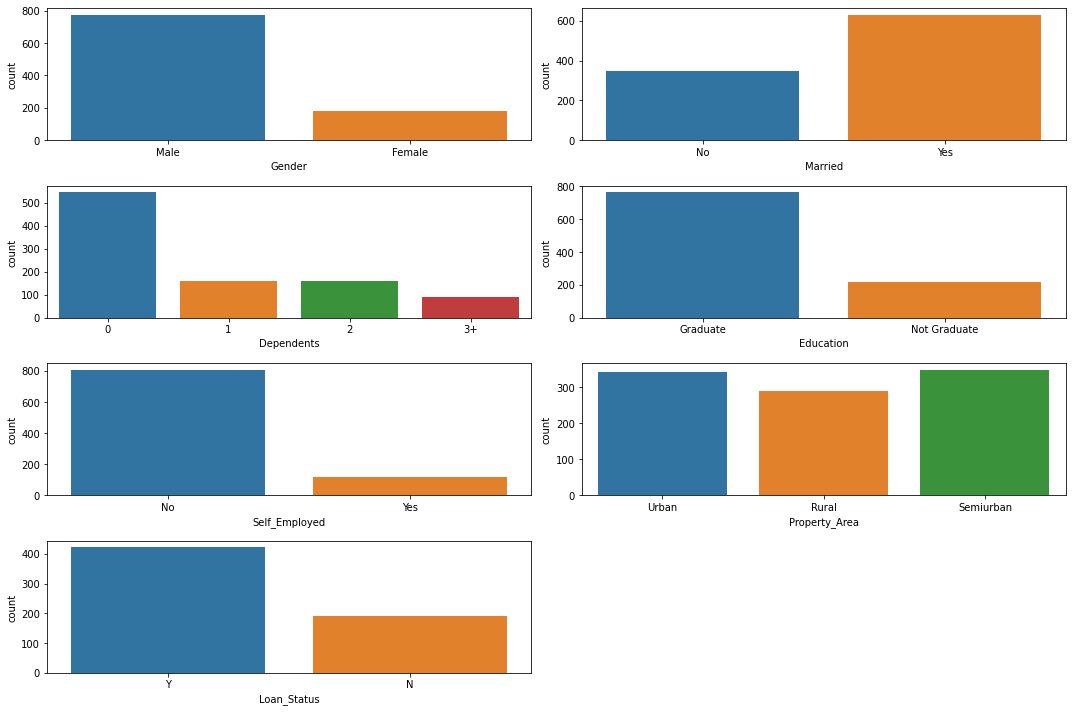

In [20]:
cat_cols=[ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status']
a=4
b=2
c=1
plt.figure(figsize=[15,10])
for i in cat_cols:
  plt.subplot(a,b,c)
  sns.countplot(combined.loc[:,i])
  plt.xlabel(i)
  c=c+1
plt.tight_layout()
plt.show()
  

In [ ]:
# Males are more than females in the dataset
# most of the are married
# most of them have no dependents
# Cat shows 3+, we will convert it into 3
# Most of the loan applicants ar graduate and are salaried in the data
# the porterty collateralinvolved is urban/Semi_urban
# Most of the people have been  granted loan

In [21]:
# Fix the 3+ in dependence
combined.Dependents.value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

In [23]:
# replace 3+
combined.Dependents.replace(to_replace='3+',value='3',inplace=True)

In [25]:
combined.Dependents.value_counts()

0    545
1    160
2    160
3     91
Name: Dependents, dtype: int64

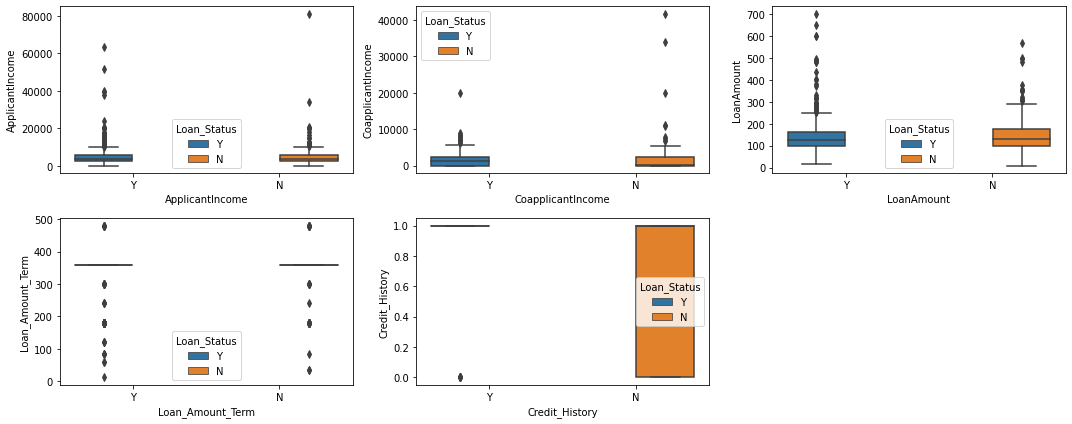

In [27]:
num_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

a=2
b=3
c=1
plt.figure(figsize=[15,6])
for i in num_cols:
  plt.subplot(a,b,c)
  sns.boxplot(combined.Loan_Status,combined.loc[:,i],hue=combined.Loan_Status)
  plt.xlabel(i)
  c=c+1
plt.tight_layout()
plt.show()


In [28]:
combined.Loan_Amount_Term.describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [30]:
combined.groupby("Loan_Status")["Loan_Amount_Term"].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,186.0,344.064516,69.238921,36.0,360.0,360.0,360.0,480.0
Y,414.0,341.072464,63.247770,12.0,360.0,360.0,360.0,480.0


In [ ]:
# loan amount term missing value will be 360

In [31]:
combined.groupby("Loan_Status")["Credit_History"].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,179.0,0.541899,0.499639,0.0,0.0,1.0,1.0,1.0
Y,385.0,0.981818,0.133782,0.0,1.0,1.0,1.0,1.0


In [38]:
# Imputting Mode in Credit History
val=combined.Credit_History.mode()[0]

combined.Credit_History.fillna(val,inplace=True)

In [33]:
# Imputting median in loan_amount_term
combined.Loan_Amount_Term.fillna(360,inplace=True)

In [34]:
combined.groupby("Loan_Status")["LoanAmount"].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Status,,,,,,,,
N,181.0,151.220994,85.862783,9.0,100.0,129.0,176.0,570.0
Y,411.0,144.294404,85.484607,17.0,100.0,126.0,161.0,700.0


In [37]:
1# (129+126)/2

combined.LoanAmount.fillna(127.5,inplace=True)

In [ ]:
combined.isnull().sum()[combined.Loan_Statue].

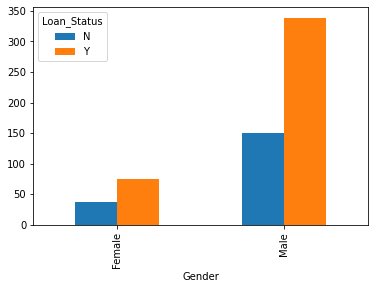

In [39]:
pd.crosstab(combined.Gender,
            combined.Loan_Status).plot(kind="bar")

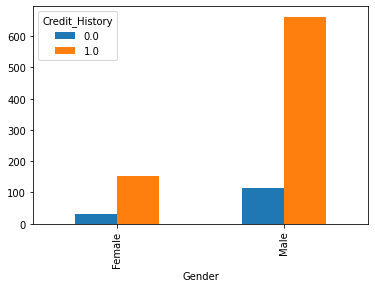

In [40]:
pd.crosstab(combined.Gender,
            combined.Credit_History).plot(kind="bar")

In [41]:
# fill male in gender missing values
combined.Gender.fillna("Male",inplace=True)

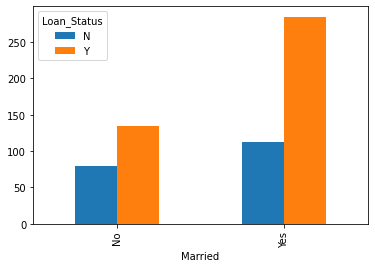

In [42]:
pd.crosstab(combined.Married,
            combined.Loan_Status).plot(kind="bar")

In [43]:
# fill married-yes missing values
combined.Married.fillna("yes",inplace=True)

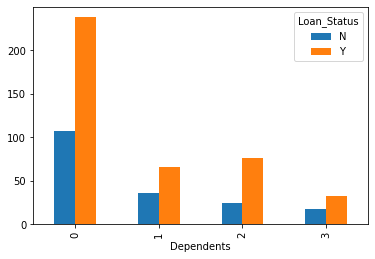

In [45]:
pd.crosstab(combined.Dependents,
            combined.Loan_Status).plot(kind="bar")

In [47]:
# fill depandents   in missing values
combined.Dependents.fillna('0',inplace=True)

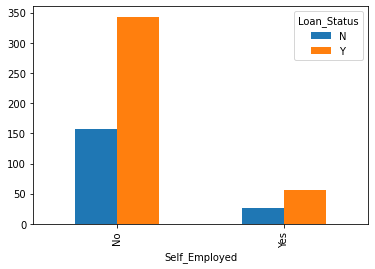

In [48]:
pd.crosstab(combined.Self_Employed,
            combined.Loan_Status).plot(kind="bar")

In [49]:
combined.Self_Employed.fillna('No',inplace=True)

In [50]:
combined.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

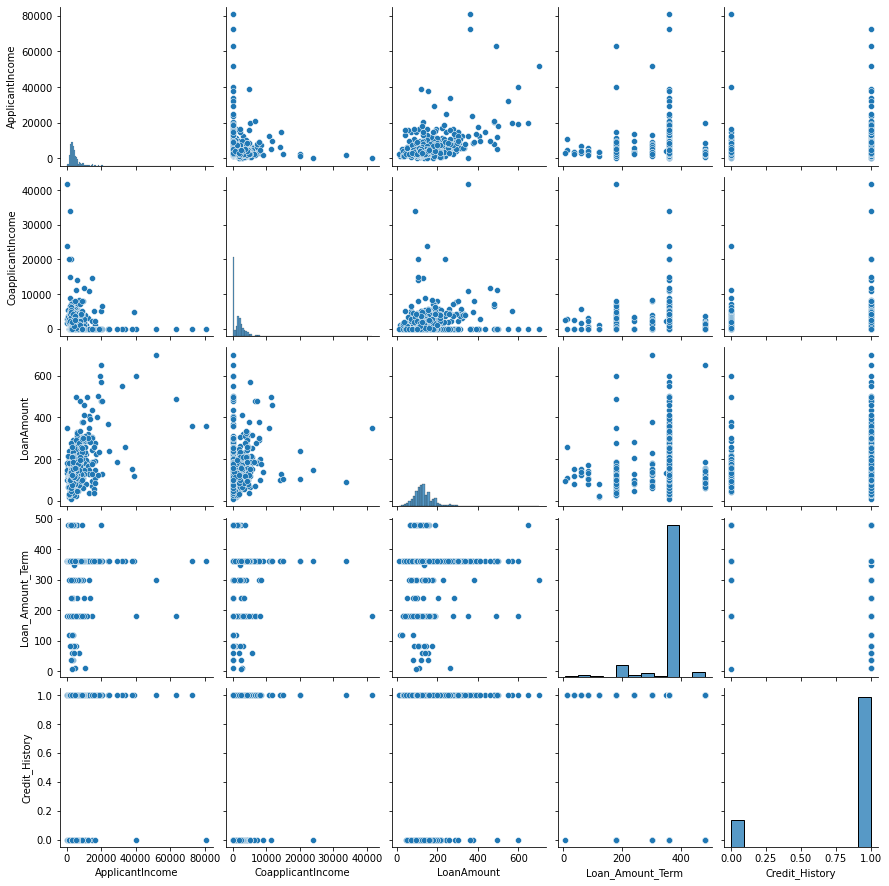

In [51]:
sns.pairplot(combined.loc[:,num_cols])

In [ ]:
# applicant income, coapplicant income , loan amount,loan_amount_term

In [52]:
cluster_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']


In [53]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, cophenet,linkage
from scipy.spatial.distance import pdist 

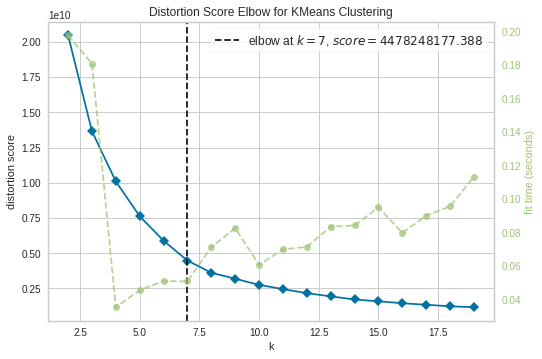

In [55]:
from yellowbrick.cluster import KElbowVisualizer
k_model=KMeans(random_state=123)
visualizer=KElbowVisualizer(estimator=k_model,k=(2,20),random_state=123)
visualizer.fit(combined.loc[:,cluster_cols])
visualizer.show()

In [56]:
sc=StandardScaler()
scaled=sc.fit_transform(combined.loc[:,cluster_cols])

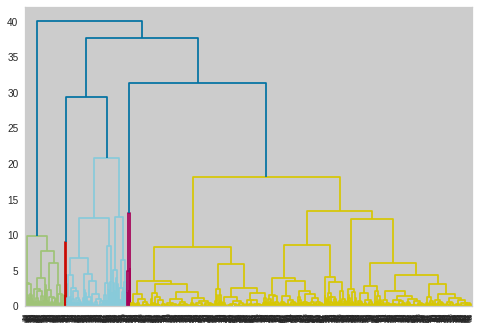

In [58]:
data=linkage(scaled,method='ward')
plot=dendrogram(data)
plt.show()

In [60]:
#  lets fit K means the n_clusters=5
k=KMeans(n_clusters=5,random_state=123)
labels=k.fit_predict(combined.loc[:,cluster_cols])


In [62]:
combined['Klabels']=labels

In [63]:
# Apply chi square test to verify the features
import scipy.stats  as stats

# Ho: That the cluster feature and the tgt variable are independent
# Ha: That the cluster Feature and the target are related.

df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Klabels"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue) # It is not Significant

0.34338320737036176


In [65]:
from sklearn.neighbors import NearestNeighbors
n=NearestNeighbors(n_neighbors=2)


In [66]:
n.fit(scaled)

NearestNeighbors(n_neighbors=2)

In [67]:
distance,index=n.kneighbors(scaled)

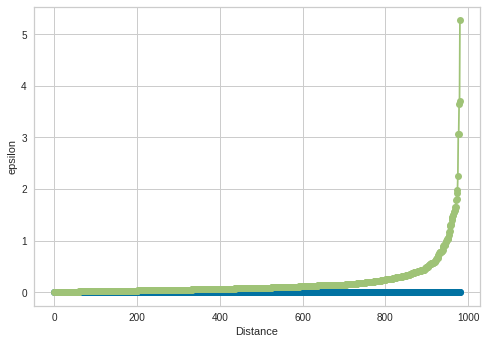

In [69]:
plt.plot(np.sort(distance,axis=0),"o-")
plt.xlabel("Distance")
plt.ylabel("epsilon")
plt.show()

In [71]:
dbscan=DBSCAN(eps=1,min_samples=len(combined.columns[:-2])+1)

labels=dbscan.fit_predict(scaled)
combined['d_labels']=labels

In [72]:
set(labels)

{-1, 0, 1}

In [73]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"d_labels"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)


In [74]:
pvalue # significant

0.018085073924214302

In [79]:
combined.drop("Klabels",axis=1,inplace=True)

In [80]:
combined.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels
0,LP001002,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [83]:
combined.drop("Loan_ID",axis=1,inplace=True)

In [ ]:
# Statistical analysis

In [84]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Education"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue)

0.04309962129357355


In [85]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Property_Area"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue)

0.0021360187811644937


In [90]:
for i in cat_cols[:-1]:
  df=pd.crosstab(combined.loc[0:train.shape[0]-1,i],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
  teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
  print('pvalue for {} var is {} '.format(i,pvalue))


pvalue for Gender var is 0.7391461310869638 
pvalue for Married var is 0.04383016690616309 
pvalue for Dependents var is 0.3688663081366005 
pvalue for Education var is 0.04309962129357355 
pvalue for Self_Employed var is 0.9710746411403309 
pvalue for Property_Area var is 0.0021360187811644937 


In [ ]:
# Singnificant features : Married, Education, PropertyArea

In [91]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [92]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Credit_History"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue) # it is significant

3.4183499979091188e-40


In [95]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0


In [101]:
combined.groupby(combined['Loan_Amount_Term']).count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status,d_labels
Loan_Amount_Term,,,,,,,,,,,,
6.0,1,1,1,1,1,1,1,1,1,1,0,1
12.0,2,2,2,2,2,2,2,2,2,2,1,2
36.0,3,3,3,3,3,3,3,3,3,3,2,3
60.0,3,3,3,3,3,3,3,3,3,3,2,3
84.0,7,7,7,7,7,7,7,7,7,7,4,7
120.0,4,4,4,4,4,4,4,4,4,4,3,4
180.0,66,66,66,66,66,66,66,66,66,66,44,66
240.0,8,8,8,8,8,8,8,8,8,8,4,8
300.0,20,20,20,20,20,20,20,20,20,20,13,20


In [96]:
# income cat basis the no of Depenents

# Family income<20000: LI
# family income<40000: MI
# Else : HI

In [104]:
combined['Family_Income']=combined['ApplicantIncome'] + combined['CoapplicantIncome']

In [105]:
def incc(x):
  if(x<=20000):
    return("Low_Inc")
  elif(x<=40000):
    return("Medium_Inc")
  else:
    return("High_Inc")

In [107]:
combined['Income_Cat']=combined.Family_Income.apply(incc)

In [108]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Income_Cat"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue) # it is significant

0.1874136802960824


In [109]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Family_Income"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue) # it is significa

0.5630504325061892


In [113]:
combined.loc[combined.Credit_History==0,'Loan_Status'].value_counts()

N    82
Y     7
Name: Loan_Status, dtype: int64

In [112]:
combined.groupby("Credit_History")['Family_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Credit_History,,,,,,,,
0.0,148.0,6583.250000,7455.015866,1830.0,4242.5,5049.5,6571.0,81000.0
1.0,833.0,6816.972293,5737.184908,1442.0,4136.0,5398.0,7453.0,72529.0


In [129]:
# Convert credit History
combined['Credit']=combined['Credit_History'].astype(int)

In [130]:
combined['Credit']=combined['Credit'].astype('object')


In [132]:
combined['Credit_Inc']=combined['Credit'].astype(str)+"_"+combined['Income_Cat']

In [133]:
df=pd.crosstab(combined.loc[0:train.shape[0]-1,"Credit_Inc"],
               combined.loc[0:train.shape[0]-1,"Loan_Status"])
teststats,pvalue,df,exp_vals=stats.chi2_contingency(df)
print(pvalue) 

1.9062759582331185e-39


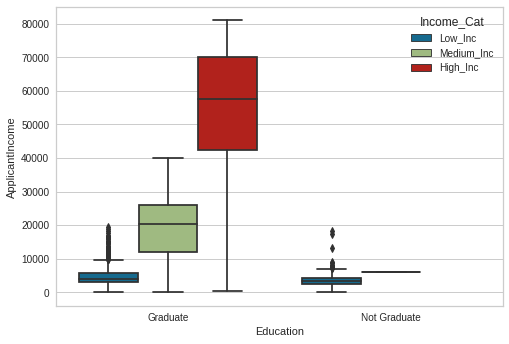

In [136]:
# check Education with ApplicationIncome
sns.boxplot(x='Education',y="ApplicantIncome",data=combined,hue="Income_Cat")

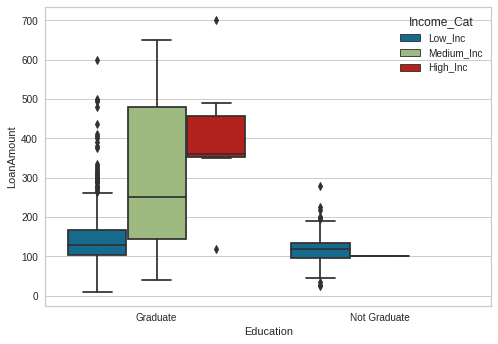

In [137]:
sns.boxplot(x='Education',y="LoanAmount",data=combined,hue="Income_Cat")

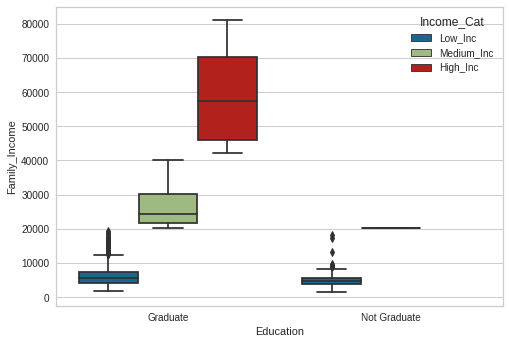

In [138]:
sns.boxplot(x='Education',y="Family_Income",data=combined,hue="Income_Cat")

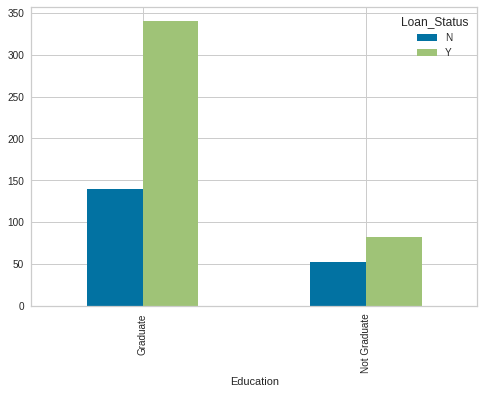

In [139]:
pd.crosstab(combined.Education,combined.Loan_Status).plot(kind="bar")

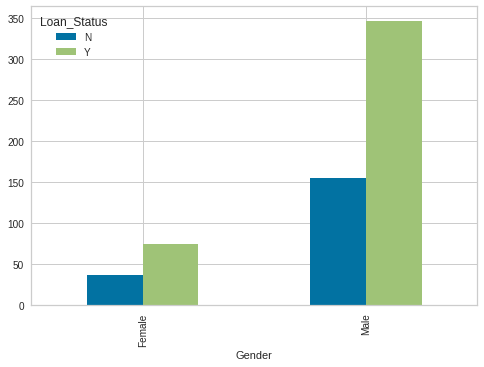

In [140]:
pd.crosstab(combined.Gender,combined.Loan_Status).plot(kind="bar")

In [141]:
# Droping insignificant variable

combined.head() # Gender,Dependents,Credit,


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,d_labels,Family_Income,Income_Cat,Credit,Credit_Inc
0,Male,No,0,Graduate,No,5849,0.0,127.5,360.0,1.0,Urban,Y,0,5849.0,Low_Inc,1,1_Low_Inc
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,6091.0,Low_Inc,1,1_Low_Inc
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,3000.0,Low_Inc,1,1_Low_Inc
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,4941.0,Low_Inc,1,1_Low_Inc
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,6000.0,Low_Inc,1,1_Low_Inc


In [143]:
finaldf=combined.drop(["Gender","ApplicantIncome","CoapplicantIncome","Dependents","Credit","Income_Cat"],axis=1)

In [ ]:
# split the Data in Train and test



In [144]:
newtrain=finaldf.loc[0:train.shape[0]-1,:]

In [145]:
newtrain.shape,train.shape

((614, 11), (614, 13))

In [147]:
newtest=finaldf.loc[train.shape[0]:,]

In [148]:
newtest=newtest.drop("Loan_Status",axis=1)

In [151]:
newtest.shape,test.shape

((367, 10), (367, 12))

In [152]:
newtrain.shape,newtest.shape

((614, 11), (367, 10))

In [153]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [154]:
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [155]:
# k fold CV
from sklearn.model_selection import StratifiedKFold


In [156]:
# Split the data in X and Y
X=newtrain.drop("Loan_Status",axis=1)
y=newtrain.Loan_Status

In [158]:
X=pd.get_dummies(X,drop_first=True)

In [160]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

kfold=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)


# Logistic Regression
logreg=LogisticRegression()
pred_log=cross_val_score(logreg,X,y,cv=kfold)
pred_log_mean=pred_log.mean()



# Decision Tree
dtree=DecisionTreeClassifier()
pred_tree=cross_val_score(dtree,X,y,cv=kfold)
pred_tree_mean=pred_tree.mean()

# Random Forest
rf=RandomForestClassifier()
pred_rf=cross_val_score(rf,X,y,cv=kfold)
pred_rf_mean=pred_rf.mean()

# GradientBoostingClassifier
gbc=GradientBoostingClassifier()
pred_gbc=cross_val_score(gbc,X,y,cv=kfold)
pred_gbc_mean=pred_gbc.mean()

#CatBoost Classifier
cbc=CatBoostClassifier()
pred_cbc=cross_val_score(cbc,X,y,cv=kfold)
pred_cbc_mean=pred_cbc.mean()

# Lightgbm

lgbm=LGBMClassifier()
pred_lgbm=cross_val_score(lgbm,X,y,cv=kfold)
pred_lgbm_mean=pred_lgbm.mean()

# XGBOOST

xgb=XGBClassifier()
pred_xgb=cross_val_score(xgb,X,y,cv=kfold)
pred_xgb_mean=pred_xgb.mean()


# Prepare the Report
d={"Models":["logReg","Tree","RF","GBM","CatBoost","LGBM","XGBC"],
   "Scores":[pred_log_mean,pred_tree_mean,pred_rf_mean,pred_gbc_mean,
             pred_cbc_mean,pred_lgbm_mean,pred_xgb_mean]}

model_perf=pd.DataFrame(d)
model_perf.sort_values(by="Scores",ascending=False)




Streaming output truncated to the last 5000 lines.
4:	learn: 0.6739279	total: 5.94ms	remaining: 1.18s
5:	learn: 0.6702354	total: 7.47ms	remaining: 1.24s
6:	learn: 0.6667121	total: 8.61ms	remaining: 1.22s
7:	learn: 0.6631814	total: 10.1ms	remaining: 1.25s
8:	learn: 0.6592799	total: 11.6ms	remaining: 1.27s
9:	learn: 0.6559940	total: 12.5ms	remaining: 1.24s
10:	learn: 0.6526802	total: 14ms	remaining: 1.25s
11:	learn: 0.6494433	total: 15.4ms	remaining: 1.27s
12:	learn: 0.6460175	total: 16.9ms	remaining: 1.28s
13:	learn: 0.6425574	total: 18.3ms	remaining: 1.29s
14:	learn: 0.6394734	total: 19.8ms	remaining: 1.3s
15:	learn: 0.6363762	total: 21.3ms	remaining: 1.31s
16:	learn: 0.6332488	total: 22.7ms	remaining: 1.31s
17:	learn: 0.6299112	total: 24.1ms	remaining: 1.32s
18:	learn: 0.6270393	total: 25.6ms	remaining: 1.32s
19:	learn: 0.6238179	total: 27.1ms	remaining: 1.33s
20:	learn: 0.6211541	total: 28ms	remaining: 1.3s
21:	learn: 0.6179847	total: 29.5ms	remaining: 1.31s
22:	learn: 0.6152134	tota

,Models,Scores
4,CatBoost,0.811102
0,logReg,0.802959
6,XGBC,0.801279
3,GBM,0.791563
2,RF,0.788311
5,LGBM,0.770345
1,Tree,0.711769


In [161]:
newtest=pd.get_dummies(newtest,drop_first=True)

In [163]:
X.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'd_labels',
       'Family_Income', 'Married_Yes', 'Married_yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_Inc_0_Low_Inc', 'Credit_Inc_0_Medium_Inc',
       'Credit_Inc_1_High_Inc', 'Credit_Inc_1_Low_Inc',
       'Credit_Inc_1_Medium_Inc'],
      dtype='object')

In [164]:
newtest.columns

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'd_labels',
       'Family_Income', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_Inc_0_Medium_Inc', 'Credit_Inc_1_High_Inc',
       'Credit_Inc_1_Low_Inc', 'Credit_Inc_1_Medium_Inc'],
      dtype='object')

In [ ]:
X.drop("Credit_Inc_0_Low_Inc",axis=True)


In [165]:
X.shape,newtest.shape

((614, 16), (367, 14))

In [ ]:
# Solution 
solution=pd.DataFrame({"loan_ID"})